July dataset:
a.     the correlation between cost of trip and trip profile (length, time of day, mileage, station, etc)

b.     the correlation of trip profiles and membership plan types

c.     how many trips are taken at each time interval at each location



In [84]:
import numpy as np        # linear algebra
import pandas as pd       # data processing, CSV file I/O (e.g. pd.read_csv())
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns       # data visualization
color = sns.color_palette()
sns.set_style('whitegrid')

In [85]:
xls = pd.ExcelFile("July.xls")

train_df = xls.parse('Usages') #2 is the sheet number
train_df = pd.DataFrame(train_df)

print('Loading train_2016 dataset...')
print('Train_2016 dataset shape: ')
print(train_df.shape)
print('The first few rows of train_2016 dataset : ')
print(train_df.head())
print('Summary of train_2016 dataset : ')
print(train_df.describe())
train_df_null = train_df.isnull().sum()
print('The ratio of missing values in each column : ')  
print(train_df_null/train_df.shape[0])


Loading train_2016 dataset...
Train_2016 dataset shape: 
(1881, 42)
The first few rows of train_2016 dataset : 
   Reservation Number  Company number  Title ZIP Code                 Vehicle  \
0            132895.0             NaN    NaN    55404  23: Blue Honda Element   
1            132921.0             NaN    NaN    55101        22: Red Scion xD   
2            132924.0             NaN    NaN    55404  23: Blue Honda Element   
3            132568.0             NaN    NaN    55403    45: Red Toyota Prius   
4            132926.0             NaN    NaN    55102    33: Silver Honda Fit   

  License Plate                             Location  \
0       848 BTD                                 MCAD   
1       771 BVH        Lowertown - 7th St E and Wall   
2       848 BTD                                 MCAD   
3       005 LTB               Nicollet and Groveland   
4       863 HVT  Mississippi Market - Selby and Dale   

                            City   Category Reservation Made (UT

In [86]:
print(train_df.dtypes)
train_df['Membership_types'] = train_df['Customer Tariff']
Membership_types = train_df['Membership_types']
Time_Cost = train_df['Time Cost']
Fees = train_df['Fees']
Mileage_cost = train_df['Mileage cost']
train_df['Total_cost'] = Time_Cost + Fees + Mileage_cost
Total_cost = train_df['Total_cost']

Reservation Number                 float64
Company number                     float64
Title                              float64
ZIP Code                            object
Vehicle                             object
License Plate                       object
Location                            object
City                                object
Category                            object
Reservation Made (UTC)      datetime64[ns]
Usage Start (Local time)    datetime64[ns]
Usage Start (UTC time)      datetime64[ns]
Usage Until (Local time)    datetime64[ns]
Usage Until (UTC time)      datetime64[ns]
Time Zone                           object
Reservation From            datetime64[ns]
Reservation Until           datetime64[ns]
mi.                                  int64
Odometer trip start                float64
Odometer trip end                  float64
Fuel level at trip end             float64
Reservation Type                    object
Cost-free                           object
Service Res

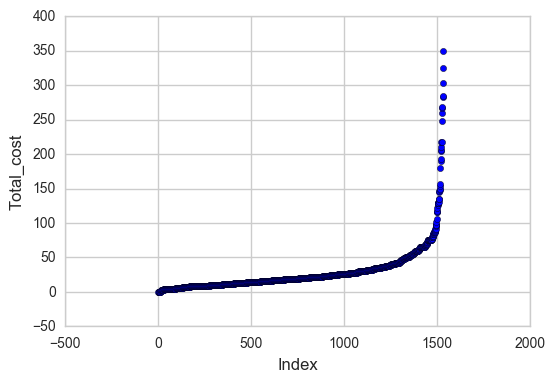

In [87]:
## now let's do some visualizaion on the training dataset
plt.scatter(range(train_df.shape[0]), np.sort(train_df.Total_cost.values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Total_cost', fontsize=12)
plt.show()

In [88]:
# Rename the columns
train_df['ZIP_Code'] = train_df['ZIP Code']
train_df['Reservation_made_time'] = train_df['Reservation Made (UTC)']
train_df['Reservation_From'] = train_df['Reservation From']
train_df['Reservation_Until'] = train_df['Reservation Until']
train_df['Reservation_length'] = train_df['Reservation_Until'] - train_df['Reservation_From'] 
train_df['Trip_Start'] = train_df['Trip Start']
train_df['Trip_End'] = train_df['Trip End']
train_df['Trip_length'] = train_df['Trip_End'] - train_df['Trip_Start']
train_df['Trip_Mileage']  = train_df['Trip Mileage ']


train_df['Usage_end_time'] = train_df['Usage Until (Local time)']

In [89]:
columns = ['Total_cost', 'Membership_types','ZIP_Code','Reservation_made_time','Reservation_length','Trip_length', 'Trip_Mileage','City','Location','Reservation_From','Reservation_Until','Usage_end_time']
train_july = pd.DataFrame(train_df, columns=columns)
train_july_null = train_july.isnull().sum()
print(train_july_null)
train_july = train_july.dropna()
train_july_null = train_july.isnull().sum()
print(train_july_null)
# new_train.head()

Total_cost               348
Membership_types         258
ZIP_Code                  14
Reservation_made_time     12
Reservation_length        12
Trip_length               75
Trip_Mileage               0
City                       0
Location                   0
Reservation_From          12
Reservation_Until         12
Usage_end_time             0
dtype: int64
Total_cost               0
Membership_types         0
ZIP_Code                 0
Reservation_made_time    0
Reservation_length       0
Trip_length              0
Trip_Mileage             0
City                     0
Location                 0
Reservation_From         0
Reservation_Until        0
Usage_end_time           0
dtype: int64


In [90]:
ZIP_Code = train_july['ZIP_Code']
City = train_july['City']
Location = train_july['Location']
Reservation_made_time = train_july['Reservation_made_time']
Reservation_From = train_july['Reservation_From']
Reservation_Until = train_df['Reservation_Until']
Usage_end_time = train_df['Usage_end_time']


In [91]:
train_df.dtypes
pd.to_datetime(Reservation_made_time)



0      2017-06-30 21:56:09
1      2017-07-01 07:01:16
2      2017-07-01 10:36:42
3      2017-06-27 11:21:27
4      2017-07-01 12:29:10
5      2017-07-01 13:34:58
6      2017-07-01 14:30:55
7      2017-06-27 17:59:55
8      2017-06-30 20:47:08
9      2017-06-30 19:56:13
10     2017-07-01 16:15:42
11     2017-07-01 16:28:39
12     2017-07-01 15:31:10
13     2017-07-01 02:49:28
14     2017-07-01 13:04:52
15     2017-07-01 17:03:11
16     2017-07-01 17:01:52
19     2017-07-01 16:22:35
20     2017-07-01 18:36:52
21     2017-07-01 04:46:42
22     2017-07-01 14:10:06
23     2017-07-01 17:33:49
24     2017-07-01 16:46:16
25     2017-07-01 15:23:45
26     2017-06-30 16:04:44
27     2017-07-01 17:48:09
28     2017-07-01 18:16:51
29     2017-06-30 19:06:31
30     2017-07-01 05:03:27
31     2017-07-01 17:44:59
               ...        
1844   2017-07-29 00:12:51
1847   2017-07-30 21:18:01
1848   2017-07-26 20:28:15
1849   2017-07-29 20:49:57
1850   2017-07-30 21:32:49
1851   2017-07-30 19:36:23
1

In [92]:

pd.to_datetime(Reservation_From)


0      2017-06-30 23:45:00
1      2017-07-01 02:30:00
2      2017-07-01 05:45:00
3      2017-07-01 07:30:00
4      2017-07-01 08:00:00
5      2017-07-01 09:00:00
6      2017-07-01 09:30:00
7      2017-07-01 08:45:00
8      2017-07-01 11:00:00
9      2017-07-01 10:00:00
10     2017-07-01 11:15:00
11     2017-07-01 12:00:00
12     2017-07-01 10:45:00
13     2017-07-01 10:00:00
14     2017-07-01 10:30:00
15     2017-07-01 12:30:00
16     2017-07-01 12:15:00
19     2017-07-01 12:15:00
20     2017-07-01 13:45:00
21     2017-07-01 11:00:00
22     2017-07-01 11:15:00
23     2017-07-01 12:30:00
24     2017-07-01 12:00:00
25     2017-07-01 12:00:00
26     2017-07-01 10:30:00
27     2017-07-01 13:00:00
28     2017-07-01 14:15:00
29     2017-07-01 15:00:00
30     2017-07-01 12:00:00
31     2017-07-01 13:30:00
               ...        
1844   2017-07-30 16:45:00
1847   2017-07-30 16:15:00
1848   2017-07-30 11:00:00
1849   2017-07-30 14:30:00
1850   2017-07-30 17:00:00
1851   2017-07-30 16:15:00
1

In [93]:
# pd.to_datetime(Reservation_Until)
pd.to_datetime(Usage_end_time)

0      2017-07-01 01:15:00
1      2017-07-01 03:15:00
2      2017-07-01 06:15:00
3      2017-07-01 09:00:00
4      2017-07-01 10:00:00
5      2017-07-01 10:15:00
6      2017-07-01 11:00:00
7      2017-07-01 11:15:00
8      2017-07-01 12:00:00
9      2017-07-01 12:30:00
10     2017-07-01 12:30:00
11     2017-07-01 12:30:00
12     2017-07-01 12:45:00
13     2017-07-01 13:15:00
14     2017-07-01 13:15:00
15     2017-07-01 13:45:00
16     2017-07-01 14:00:00
17     2017-07-01 14:15:00
18     2017-07-01 14:15:00
19     2017-07-01 14:15:00
20     2017-07-01 14:15:00
21     2017-07-01 14:30:00
22     2017-07-01 14:30:00
23     2017-07-01 14:30:00
24     2017-07-01 15:00:00
25     2017-07-01 15:45:00
26     2017-07-01 16:00:00
27     2017-07-01 16:00:00
28     2017-07-01 16:15:00
29     2017-07-01 17:00:00
               ...        
1851   2017-07-30 18:30:00
1852   2017-07-30 18:30:00
1853   2017-07-30 19:00:00
1854   2017-07-30 19:00:00
1855   2017-07-30 19:00:00
1856   2017-07-30 19:15:00
1

In [94]:
train_july['Reservation_Made_time'],train_july['Reservation_Made_Date']= Reservation_made_time.apply(lambda x:x.time()), Reservation_made_time.apply(lambda x:x.date())
# print(train_july['Reservation_Made_time'])
# print(train_july['Reserved_Date'])

In [95]:
train_july['Reservation_From_Time'],train_july['Reservation_From_Date']= Reservation_From.apply(lambda x:x.time()), Reservation_From.apply(lambda x:x.date())

In [96]:
difference = Reservation_Until - Reservation_From
print(difference)
difference = difference.dropna()
print(difference)


0      0 days 01:30:00
1      0 days 00:45:00
2      0 days 00:30:00
3      0 days 01:30:00
4      0 days 02:00:00
5      0 days 01:15:00
6      0 days 01:30:00
7      0 days 02:30:00
8      0 days 01:00:00
9      0 days 02:30:00
10     0 days 01:15:00
11     0 days 00:30:00
12     0 days 02:00:00
13     0 days 03:15:00
14     0 days 02:45:00
15     0 days 01:15:00
16     0 days 01:45:00
17                 NaT
18                 NaT
19     0 days 02:00:00
20     0 days 00:30:00
21     0 days 03:30:00
22     0 days 03:15:00
23     0 days 02:00:00
24     0 days 03:00:00
25     0 days 03:15:00
26     0 days 05:30:00
27     0 days 03:00:00
28     0 days 02:00:00
29     0 days 02:00:00
             ...      
1851   0 days 02:15:00
1852               NaT
1853   0 days 01:30:00
1854   0 days 03:30:00
1855   0 days 01:45:00
1856               NaT
1857   0 days 01:30:00
1858   0 days 01:00:00
1859   0 days 03:00:00
1860   0 days 02:00:00
1861   0 days 00:45:00
1862   0 days 00:45:00
1863   0 da

In [97]:
# train_july['Reservation_Until_Time'],train_july['Reservation_Until_Date']= Reservation_Until.apply(lambda x:x.time()), Reservation_Until.apply(lambda x:x.date())
train_july['Usage_End_Time'],train_july['Usage_End_Date']= Usage_end_time.apply(lambda x:x.time()), Usage_end_time.apply(lambda x:x.date())
print(train_july.dtypes)

Total_cost                       float64
Membership_types                  object
ZIP_Code                          object
Reservation_made_time     datetime64[ns]
Reservation_length       timedelta64[ns]
Trip_length              timedelta64[ns]
Trip_Mileage                       int64
City                              object
Location                          object
Reservation_From          datetime64[ns]
Reservation_Until         datetime64[ns]
Usage_end_time            datetime64[ns]
Reservation_Made_time             object
Reservation_Made_Date             object
Reservation_From_Time             object
Reservation_From_Date             object
Usage_End_Time                    object
Usage_End_Date                    object
dtype: object


In [99]:
Reservation_From_Time = train_july['Reservation_From_Time']
Reservation_From_Date = train_july['Reservation_From_Date']
Usage_End_Time= train_july['Usage_End_Time']
Usage_End_Date = train_july['Usage_End_Date']

print(train_july.dtypes)

import datetime as dt
dt.timedelta(Reservation_From_Time)



Total_cost                       float64
Membership_types                  object
ZIP_Code                          object
Reservation_made_time     datetime64[ns]
Reservation_length       timedelta64[ns]
Trip_length              timedelta64[ns]
Trip_Mileage                       int64
City                              object
Location                          object
Reservation_From          datetime64[ns]
Reservation_Until         datetime64[ns]
Usage_end_time            datetime64[ns]
Reservation_Made_time             object
Reservation_Made_Date             object
Reservation_From_Time             object
Reservation_From_Date             object
Usage_End_Time                    object
Usage_End_Date                    object
dtype: object


TypeError: unsupported type for timedelta days component: Series

In [ ]:
Trip_time = train_july['Usage_End_Time'] - train_july['Reservation_From_Time']
Trip_day = train_july['Usage_End_Date'] - train_july['Reservation_From_Date']
train_july['Reservation_length'] = Trip_day * 3600 + Trip_time.item().total_seconds()
Reservation_length = train_july['Reservation_length'] 

In [ ]:
print(Reservation_length)
# print(Trip_length)
# print(difference) # pay attention to these customers, their actual used time is greater than their reserved time

In [ ]:
# same for trip start and trip end
Trip_length = train_july['Trip_length']
Trip_Mileage  = train_july['Trip_Mileage']
difference = Reservation_length - Trip_length

In [ ]:
# When people prefer to make a reservation on line
plt.scatter(range(train_july.shape[0]), np.sort(train_july['Reservation_Made_time']))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Reservation_Made_time', fontsize=12)
plt.show()
# People prefer to make reservation after work, specially from 17:00pm to 12:00pm
# So maybe more promotions can be put for this specific time period, also more 
# customer support can be support to help customers reservations

In [ ]:
plt.scatter(range(train_july.shape[0]), np.sort(train_july['Reservation_From_Time']))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Reservation_From_Time', fontsize=12)
plt.show()
# customers prefer to use the car between 12:00pm and 12:00am

In [ ]:
sns.regplot(x='Reservation_length',y='Total_cost', fit_reg=True,  data=train_july)
plt.xlabel("Reservation_length")
plt.ylabel("Total_cost")
plt.title("The association between N-Reservation_length and Total_cost")
plt.show()


In [ ]:
sns.regplot(x='Trip_Mileage',y='Total_cost', fit_reg=True,  data=train_july)
plt.xlabel("Trip_Mileage")
plt.ylabel("Total_cost")
plt.title("The association between N-Trip_Mileage and Total_cost")
plt.show()

In [ ]:
sns.countplot(x='Membership_types', data=train_july)
plt.xticks(rotation=70)
plt.xlabel('Membership_types')
plt.title('Membership_types')
plt.show()

In [ ]:
sns.factorplot(x='Reservation_length', y='Membership_types',data=train_july, kind='bar',ci=None)
plt.xlabel('Reservation_length')
plt.ylabel('Membership_types')
plt.title('The relationship between Reservation_length and Membership_types')
plt.show()

In [ ]:
sns.factorplot(x='Trip_Mileage', y='Membership_types',data=train_july, kind='bar',ci=None)
plt.xlabel('Trip_Mileage')
plt.ylabel('Membership_types')
plt.title('The relationship between Trip_Mileage and Membership_types')
plt.show()

In [ ]:
# explore location and city
